In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

#df = pd.read_csv("NYC_Collisions.csv", parse_dates=["Date"], index_col ="Date")
df = pd.read_csv("NYC_Collisions.csv")
# CONCAT TWO COLUMNS
df["DateTime"] = df["Date"]+" "+df["Time"]
# PARSE DATATIME
df["DateTime"] = pd.to_datetime(df["DateTime"])
print(df.columns)
print("\n------------\n")
print(df.info())
print("\n------------\n")
print(df.iloc[0])
print("\n------------\n")
# DROP COLUMN: Cross Street
print("\nDROP COLUMN: Cross Street\n")
df.drop(["Cross Street"], axis =1, inplace = True)

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed', 'DateTime'],
      dtype='object')

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         238421 non-null  int64         
 1   Date                 238421 non-null  object        
 2   Time                 238421 non-null  object        
 3   Borough              231224 non-null  object        
 4   Street Name          238058 non-null  object        
 5   Cross Street         111291 non-null  object        
 6   Latitude             216098 non-nul

In [2]:
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"]
vehicle_type.describe()

count unique                     top    freq
Vehicle Type                                                         
Bicycle                   5533      1                 Bicycle    5533
Bus                       4197      1                     Bus    4197
Construction               894      1            Construction     894
Delivery Vehicle          1695      1        Delivery Vehicle    1695
Emergency Services        1823      1      Emergency Services    1823
Fire Services              196      1           Fire Services     196
Limousine                   97      1               Limousine      97
Motorcycle                2009      1              Motorcycle    2009
Not Reported              3126      1            Not Reported    3126
Other                     1321      1                   Other    1321
Other (Open Passenger)      16      1  Other (Open Passenger)      16
Passenger Vehicle       201842      1       Passenger Vehicle  201842
Scooter                   2137      1                 Scooter    2137
Taxi                      6015      1                    Taxi    6015
Transport                 6642      1               Transport    6642
Unknown                     22      1                 Unknown      22
Utility Vehicle            856      1         Utility Vehicle     856

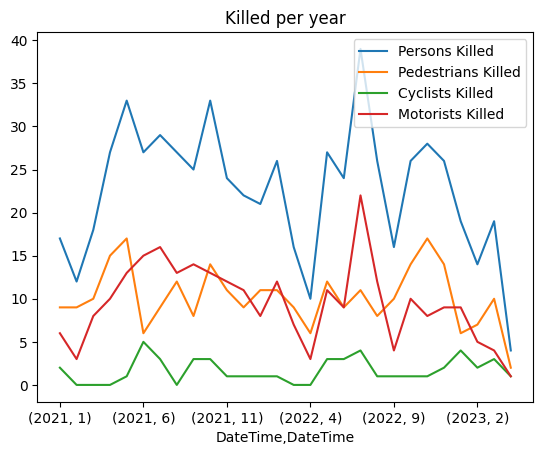

In [6]:
persons_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', title='Killed per year', legend=True)
plt.show()

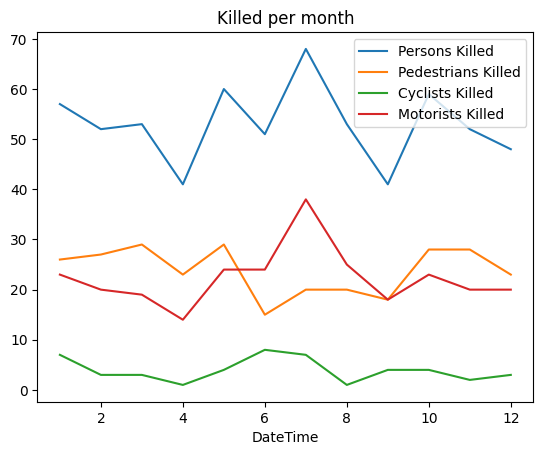

In [4]:
persons_killed = df.groupby([df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', title='Killed per month', legend=True)
plt.show()

<Axes: title={'center': 'Collisions per vehicle type'}, xlabel='Vehicle Type', ylabel='Num collisions'>

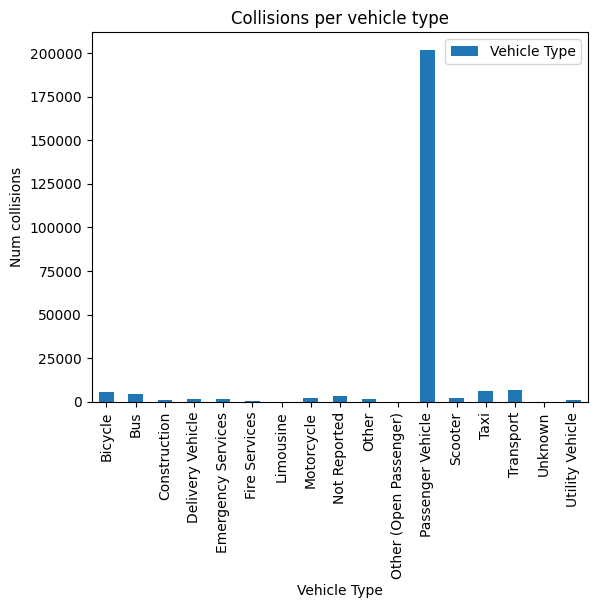

In [5]:
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"].count()
vehicle_type.plot(kind='bar', ylabel='Num collisions', title='Collisions per vehicle type', legend=True)

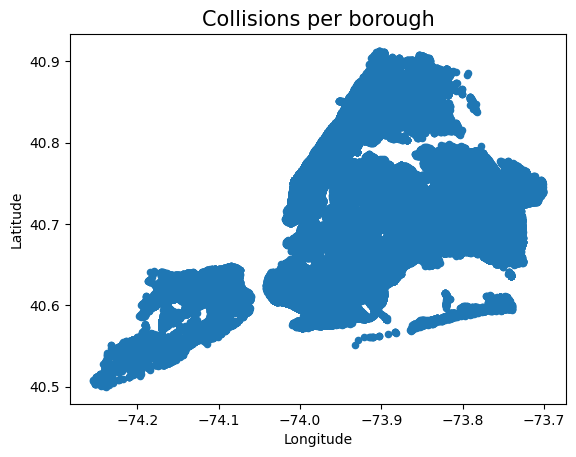

In [7]:
lat_long = df[["Latitude", "Longitude"]]
# lat_long.plot.scatter(y='Latitude', x='Longitude')
lat_long.plot(y='Latitude', x='Longitude', kind="scatter", legend=True)
# df.plot(y='Latitude', x='Longitude', kind="scatter")
plt.title('Collisions per borough', fontsize=15) 
plt.show()

In [7]:
print('Min/max')
print('Latitude', lat_long["Latitude"].min(), '/', lat_long["Latitude"].max())
print('Longitude', lat_long["Longitude"].min(), '/', lat_long["Longitude"].max())

Min/max
Latitude 40.49971 / 40.912884
Longitude -74.25496 / -73.70061


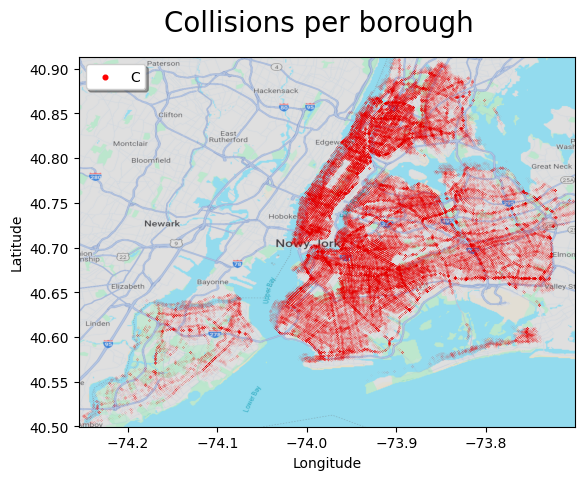

In [15]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])
#lat_long_killed.plot.scatter(y='Latitude', x='Longitude', legend=True)
ax.scatter(lat_long["Longitude"], lat_long["Latitude"], color='red', s=0.0005, alpha=1)
fig.suptitle('Collisions per borough', fontsize=20) 
ax.legend(labels=('Collision'), loc='upper left', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [17]:
lat_long_hour = df[["Latitude", "Longitude", "DateTime"]].copy()
lat_long_hour["Hour"] = lat_long_hour["DateTime"].dt.hour
# print(lat_long_datetime["DateTime"].dt.time.min())
# print(lat_long_datetime["DateTime"].dt.time.max())
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).size())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).head())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).first())

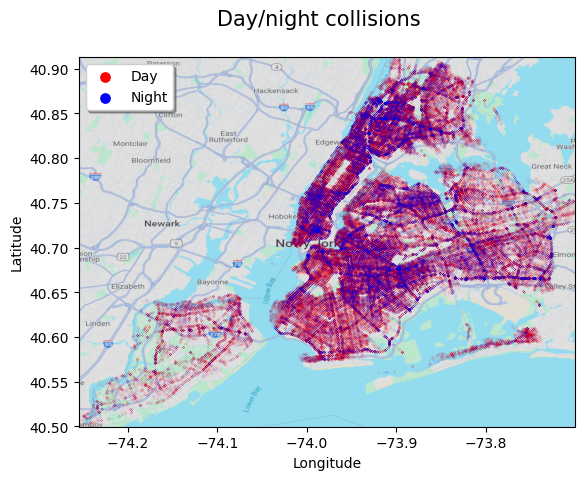

In [18]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Longitude"], 
           lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Latitude"], 
           s=0.002, 
           c='red')
ax.scatter(lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Longitude"], 
           lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Latitude"], 
           s=0.002, 
           c='blue')
# ax.scatter(lat_long_datetime["Longitude"], lat_long_datetime["Latitude"], s=0.0005, c='blue')
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Day/night collisions', fontsize=15) 
ax.legend(labels=('Day', 'Night'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
borough = df.loc[:, ['Borough', 'Latitude', 'Longitude']].copy()
print(borough.groupby(borough['Borough'])['Borough'].count())
print('\n------- NULLS\n')
print('Borough', borough['Borough'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('\n-------\n')
print(borough.count())
print('\n-------\n')
borough.dropna(inplace=True)
borough.count()
print('\n-------\n')
borough.info()

Borough
Bronx            41255
Brooklyn         76416
Manhattan        38234
Queens           63751
Staten Island    11568
Name: Borough, dtype: int64

------- NULLS

Borough 7197
Latitude 22323
Latitude 22323

-------

Borough      231224
Latitude     216098
Longitude    216098
dtype: int64

-------


-------

<class 'pandas.core.frame.DataFrame'>
Index: 216098 entries, 0 to 238420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Borough    216098 non-null  object 
 1   Latitude   216098 non-null  float64
 2   Longitude  216098 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.6+ MB


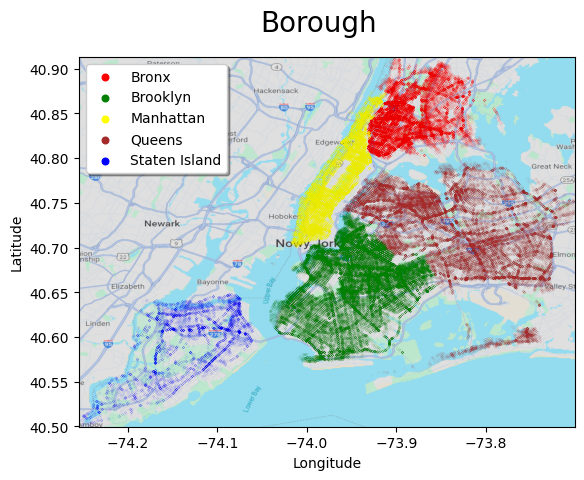

In [14]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(borough.loc[borough["Borough"] == 'Bronx', "Longitude"], 
           borough.loc[borough["Borough"] == 'Bronx', "Latitude"], 
           s=0.001, 
           c='red')
ax.scatter(borough.loc[borough["Borough"] == 'Brooklyn', "Longitude"], 
           borough.loc[borough["Borough"] == 'Brooklyn', "Latitude"], 
           s=0.001, 
           c='green')
ax.scatter(borough.loc[borough["Borough"] == 'Manhattan', "Longitude"], 
           borough.loc[borough["Borough"] == 'Manhattan', "Latitude"], 
           s=0.001, 
           c='yellow')
ax.scatter(borough.loc[borough["Borough"] == 'Queens', "Longitude"], 
           borough.loc[borough["Borough"] == 'Queens', "Latitude"], 
           s=0.001, 
           c='brown')
ax.scatter(borough.loc[borough["Borough"] == 'Staten Island', "Longitude"], 
           borough.loc[borough["Borough"] == 'Staten Island', "Latitude"], 
           s=0.001, 
           c='blue')


# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Borough', fontsize=20) 
ax.legend(labels=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
# DROP

borough = df.loc[:, ['Borough', 'Latitude', 'Longitude']].copy()
print(borough.groupby(borough['Borough'])['Borough'].count())
print('\n------- NULLS\n')
print('Borough', borough['Borough'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('\n-------\n')
print(borough.count())
print('\n-------\n')
borough.dropna(inplace=True)
print(borough.count())
print('\n-------\n')
borough.info()

Borough
Bronx            41255
Brooklyn         76416
Manhattan        38234
Queens           63751
Staten Island    11568
Name: Borough, dtype: int64

------- NULLS

Borough 7197
Latitude 22323
Latitude 22323

-------

Borough      231224
Latitude     216098
Longitude    216098
dtype: int64

-------

Borough      216098
Latitude     216098
Longitude    216098
dtype: int64

-------

<class 'pandas.core.frame.DataFrame'>
Index: 216098 entries, 0 to 238420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Borough    216098 non-null  object 
 1   Latitude   216098 non-null  float64
 2   Longitude  216098 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.6+ MB


In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

# putting feature variable to x
x = borough.drop(['Borough'], axis=1)
# putting target variable to y
y = borough['Borough']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test, y_train, y_test

(         Latitude  Longitude
 205900  40.754055 -73.976290
 18280   40.716526 -73.823080
 59298   40.752210 -73.904430
 113229  40.740223 -73.954865
 472     40.688698 -73.781494
 ...           ...        ...
 164548  40.820187 -73.890686
 92665   40.818470 -73.941400
 192738  40.757847 -73.991234
 30600   40.822826 -73.916580
 29411   40.688904 -73.754456
 
 [151268 rows x 2 columns],
          Latitude  Longitude
 33112   40.702904 -73.818820
 36499   40.668495 -73.925606
 74655   40.697086 -73.803400
 106359  40.735200 -73.985800
 88099   40.585389 -73.814655
 ...           ...        ...
 85519   40.854823 -73.911194
 25906   40.802498 -73.940920
 236538  40.628445 -73.991800
 207556  40.635150 -74.140680
 34274   40.833916 -73.927020
 
 [64830 rows x 2 columns],
 205900    Manhattan
 18280        Queens
 59298        Queens
 113229       Queens
 472          Queens
             ...    
 164548        Bronx
 92665     Manhattan
 192738    Manhattan
 30600         Bronx
 29411     

In [8]:
dt_borough = DecisionTreeClassifier()
dt_borough.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred_train = dt_borough.predict(x_train)

In [27]:
print(classification_report(y_train, y_pred_train))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     26489
     Brooklyn       1.00      1.00      1.00     51138
    Manhattan       1.00      1.00      1.00     25020
       Queens       1.00      1.00      1.00     41301
Staten Island       1.00      1.00      1.00      7320

     accuracy                           1.00    151268
    macro avg       1.00      1.00      1.00    151268
 weighted avg       1.00      1.00      1.00    151268



In [21]:
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[26420     0     5     0     0]
 [    0 51086     0     7     0]
 [    2     0 25171     0     0]
 [    0    27     0 41140     0]
 [    0     0     0     0  7410]]
0.9997289578760875


In [28]:
y_pred_default = dt_borough.predict(x_test)

In [23]:
print(classification_report(y_test, y_pred_default))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     11357
     Brooklyn       1.00      1.00      1.00     21912
    Manhattan       1.00      1.00      1.00     10783
       Queens       1.00      1.00      1.00     17757
Staten Island       1.00      1.00      1.00      3021

     accuracy                           1.00     64830
    macro avg       1.00      1.00      1.00     64830
 weighted avg       1.00      1.00      1.00     64830



In [24]:
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

[[11352     0     5     0     0]
 [    0 21902     0    10     0]
 [    3     1 10779     0     0]
 [    0    22     0 17735     0]
 [    0     0     0     0  3021]]
0.999367576739164


In [29]:
import pydotplus

features = list(x_train.columns)
dot_data = StringIO()
export_graphviz(dt_borough, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf('borough.pdf') # file saved to currunt working directory
Image(graph.create_png())

In [30]:
y_pred = dt_borough.predict([[40.68, -73.97]])
y_pred

/root/Studia/python/analiza_danych/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Brooklyn'], dtype=object)

In [12]:
x_df = pd.DataFrame([[40.68, -73.97]], columns=['Latitude','Longitude'])
y_pred = dt_borough.predict(x_df)
y_pred

array(['Brooklyn'], dtype=object)

In [13]:
dt_borough.predict(pd.DataFrame([[40.68, -73.97]], columns=['Latitude','Longitude']))[0]

'Brooklyn'

In [89]:
dt_borough.predict(pd.DataFrame([[borough['Latitude'][1], borough['Longitude'][1]]], columns=['Latitude','Longitude']))[0]

'Brooklyn'

In [14]:
borough = borough.assign(Borough_fit = lambda x: (
    dt_borough.predict(
        pd.DataFrame([[x['Latitude'][5], x['Longitude'][5]]], columns=['Latitude','Longitude']))[0]))
borough.head()

Borough  Latitude  Longitude Borough_fit
0      Bronx  40.83398 -73.826350   Manhattan
1   Brooklyn  40.68730 -73.973656   Manhattan
3      Bronx  40.88270 -73.892730   Manhattan
4   Brooklyn  40.63791 -73.978640   Manhattan
5  Manhattan  40.84863 -73.927620   Manhattan

In [61]:
borough['Borough_fit'] = borough.apply(lambda x: 
                                       dt_borough.predict(
                                        pd.DataFrame(
                                            [[x['Latitude'], x['Longitude']]], columns=['Latitude','Longitude']
                                        ))[0]
                                       , axis=1)
borough.head(20)

Borough   Latitude  Longitude    Borough_fit
0           Bronx  40.833980 -73.826350          Bronx
1        Brooklyn  40.687300 -73.973656       Brooklyn
3           Bronx  40.882700 -73.892730          Bronx
4        Brooklyn  40.637910 -73.978640       Brooklyn
5       Manhattan  40.848630 -73.927620      Manhattan
6        Brooklyn  40.660090 -73.900550       Brooklyn
7        Brooklyn  40.705807 -73.931760       Brooklyn
8        Brooklyn  40.663227 -73.931590       Brooklyn
9        Brooklyn  40.671482 -73.882840       Brooklyn
10         Queens  40.656384 -73.753060         Queens
11       Brooklyn  40.727700 -73.946090       Brooklyn
12          Bronx  40.818047 -73.922460          Bronx
13       Brooklyn  40.622997 -73.975685       Brooklyn
14      Manhattan  40.766277 -73.977690      Manhattan
15         Queens  40.782280 -73.914604         Queens
16  Staten Island  40.628098 -74.111040  Staten Island
18       Brooklyn  40.610947 -73.962555       Brooklyn
19         Queens  40.772040 -73.792370         Queens
20       Brooklyn  40.656400 -73.903450       Brooklyn
21          Bronx  40.811638 -73.931600          Bronx

In [62]:
borough.to_csv('borough.csv', index=False)

In [63]:
borough = borough.assign(Borough_fit = lambda x: (
    dt_borough.predict(
        pd.DataFrame([[x['Latitude'], x['Longitude']]], columns=['Latitude','Longitude']))[0]))
borough.head()

In [38]:
borough2 = pd.read_csv('borough.csv')
borough2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216098 entries, 0 to 216097
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Borough      216098 non-null  object 
 1   Latitude     216098 non-null  float64
 2   Longitude    216098 non-null  float64
 3   Borough_fit  216098 non-null  object 
dtypes: float64(2), object(2)
memory usage: 6.6+ MB


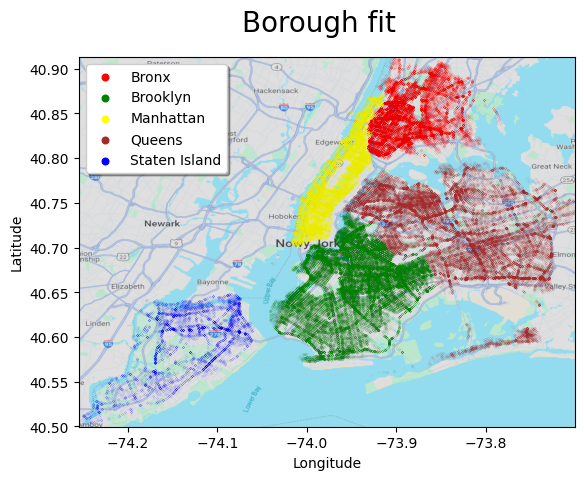

In [32]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Bronx', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Bronx', "Latitude"], 
           s=0.001, 
           c='red')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Brooklyn', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Brooklyn', "Latitude"], 
           s=0.001, 
           c='green')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Manhattan', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Manhattan', "Latitude"], 
           s=0.001, 
           c='yellow')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Queens', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Queens', "Latitude"], 
           s=0.001, 
           c='brown')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Staten Island', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Staten Island', "Latitude"], 
           s=0.001, 
           c='blue')


# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Borough fit', fontsize=20) 
ax.legend(labels=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [33]:
borough2['Borough'].equals(borough2['Borough_fit'])

False

In [57]:
borough2['Diff'] = borough2.apply(lambda x: False if x['Borough'] == x['Borough_fit'] else True, axis=1)
diff = borough2.loc[borough2['Diff'] == True]
diff

Borough   Latitude  Longitude Borough_fit  Diff
95        Queens  40.677547  -73.86194    Brooklyn  True
7041      Queens  40.705364  -73.91461    Brooklyn  True
15067   Brooklyn  40.684277  -73.86649      Queens  True
15239     Queens  40.701046  -73.91068    Brooklyn  True
20568   Brooklyn  40.696350  -73.90541      Queens  True
...          ...        ...        ...         ...   ...
209552    Queens  40.702362  -73.91291    Brooklyn  True
210762    Queens  40.679447  -73.86302    Brooklyn  True
214460    Queens  40.670254  -73.85728    Brooklyn  True
214633  Brooklyn  40.685270  -73.86661      Queens  True
215990  Brooklyn  40.661674  -73.86090      Queens  True

[94 rows x 5 columns]

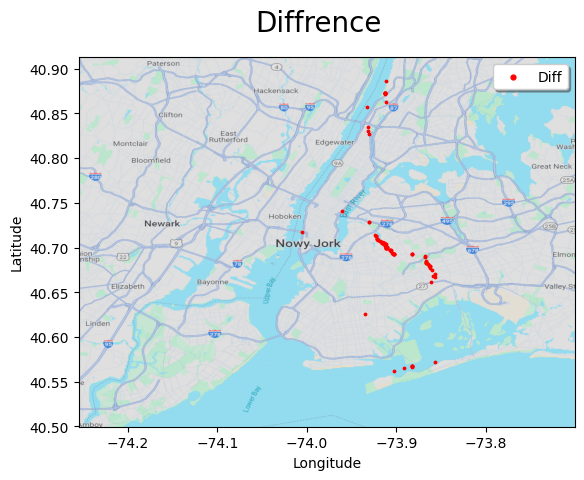

In [58]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(borough2.loc[borough2['Diff'] == True, "Longitude"], 
           borough2.loc[borough2['Diff'] == True, "Latitude"], 
           s=3, 
           c='red')

fig.suptitle('Diffrence', fontsize=20) 
ax.legend(labels=('Diff', ), loc='best', shadow=True, markerscale=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# Here, K-fold split randomly our dataset into 5 parts(or number of keys mentioned), 4 of which is used as training and 1 is used as testing,
# for that perticular pass of grid search cv of cross validation.


# parameter to built the model on
parameter = {'max_depth':range(1,10)}
# its a dictionary and it that we hae take a range of 1-10 for max_depth and run the decision tree modeling process for thi range of max_depth, in return
# it give us the best result


# instantiate to the model
dtree =  DecisionTreeClassifier(criterion='gini', random_state=100)


# fit tree on training data
tree = GridSearchCV(dtree, parameter, cv=n_folds, scoring='accuracy', return_train_score=True)
tree.fit(x_train, y_train)
# if we are running the Decision Tree model it will take less modeling time as it just run 1 time.
# now we are running GridSearchCV for range of 1 to 10, hence it take more modeling time, as it runs decisin mmodel for 10 times.
# GridSearchCV is also use for other ML algos.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [12]:
# scores of GridSearchCV

scores = tree.cv_results_
print(pd.DataFrame(scores))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.105441      0.003152         0.017228        0.000178   
1       0.124062      0.000399         0.017503        0.000043   
2       0.142609      0.000347         0.017645        0.000055   
3       0.161046      0.000535         0.017968        0.000105   
4       0.178066      0.000592         0.017961        0.000108   
5       0.195240      0.002897         0.018019        0.000178   
6       0.203056      0.003273         0.018099        0.000183   
7       0.211430      0.004689         0.018053        0.000055   
8       0.214550      0.006122         0.018075        0.000149   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.512230           0.512164   
1               2  {'max_depth': 2}           0.741720           0.738349   
2               3  {'max_depth': 3}           0.837674           0.838203   
3               4  {'

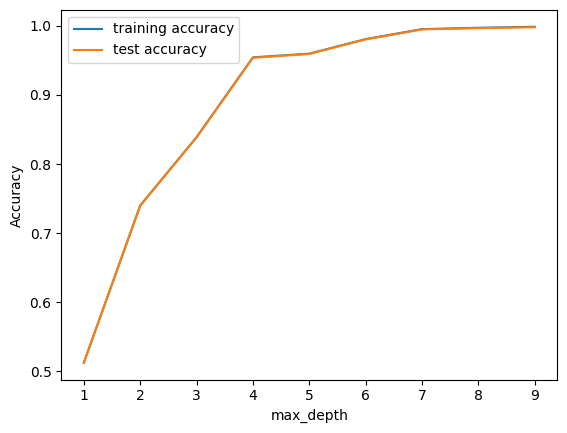

In [11]:
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label="training accuracy")
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label="test accuracy")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()